In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
datafile = '/content/Cardiotocographic.csv'
df = pd.read_csv(datafile)

# Task 1: Data Cleaning and Preparation
print("Missing Values:\n", df.isnull().sum())
df.fillna(df.median(), inplace=True)
print("Data Types:\n", df.dtypes)
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.median(), inplace=True)

# Detect outliers using the IQR method
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df = remove_outliers(df, numerical_columns)



Missing Values:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
Data Types:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [4]:
# Task 2: Statistical Summary
# ----------------------------
summary = df.describe().T
summary['median'] = df.median()
summary['iqr'] = summary['75%'] - summary['25%']
print("Statistical Summary:\n", summary)


Statistical Summary:
           count        mean        std         min         25%         50%  \
LB        917.0  132.198962   9.315219  106.000000  125.000000  133.000000   
AC        917.0    0.003866   0.003710   -0.000122    0.000000    0.002985   
FM        917.0    0.000586   0.001308   -0.002076    0.000000    0.000000   
UC        917.0    0.004902   0.002679   -0.000101    0.003140    0.004988   
DL        917.0    0.001529   0.002263   -0.000124    0.000000    0.000000   
DS        917.0    0.000000   0.000000    0.000000    0.000000    0.000000   
DP        917.0    0.000000   0.000000    0.000000    0.000000    0.000000   
ASTV      917.0   42.988288  15.164262   15.000000   29.000000   42.000000   
MSTV      917.0    1.221960   0.502493    0.200000    0.800000    1.200000   
ALTV      917.0    4.407001   8.350133   -0.899870    0.000000    0.000000   
MLTV      917.0    8.420946   4.325025   -0.136053    5.607756    8.200000   
Width     917.0   65.746068  31.175068   1

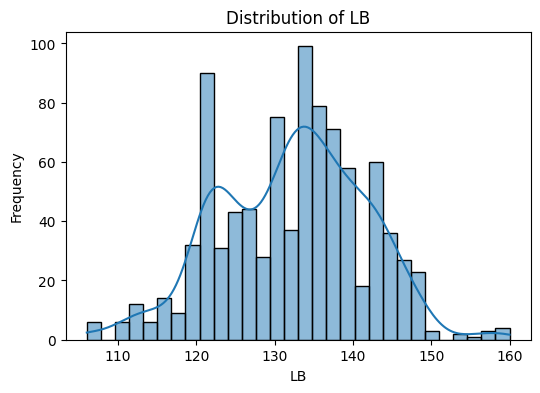

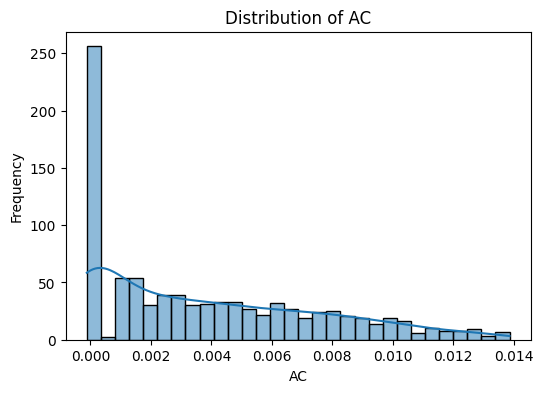

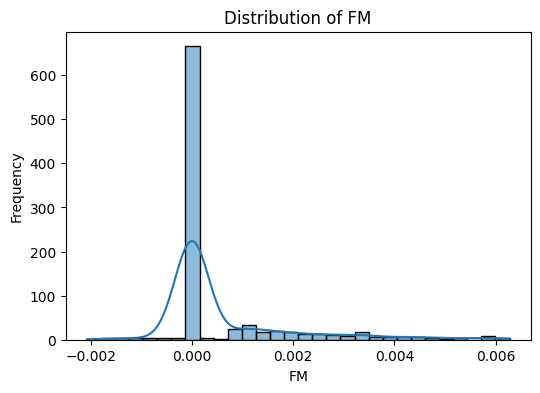

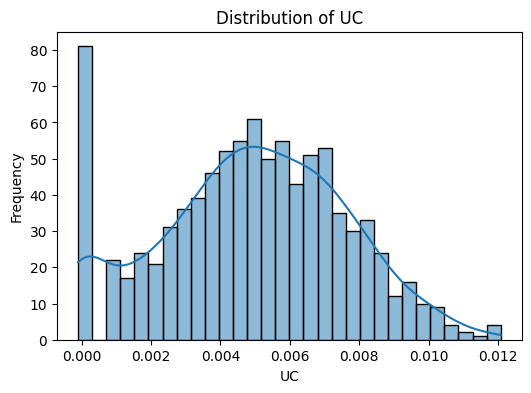

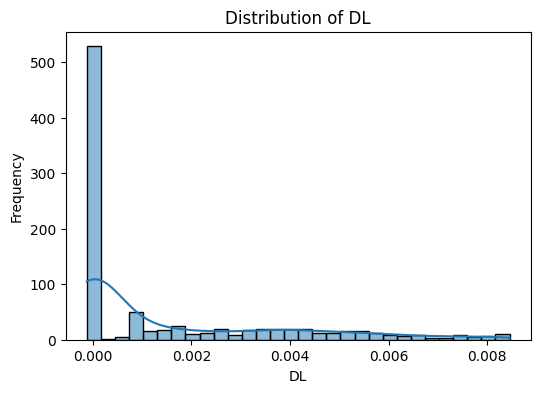

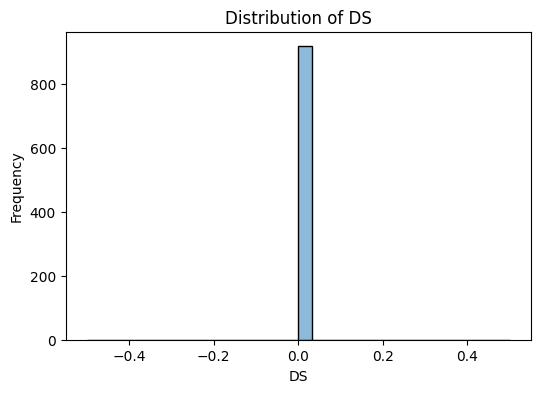

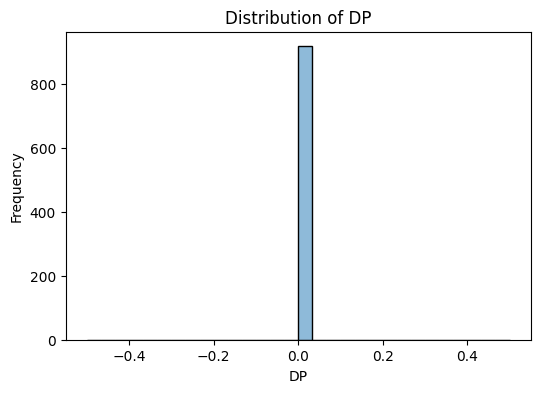

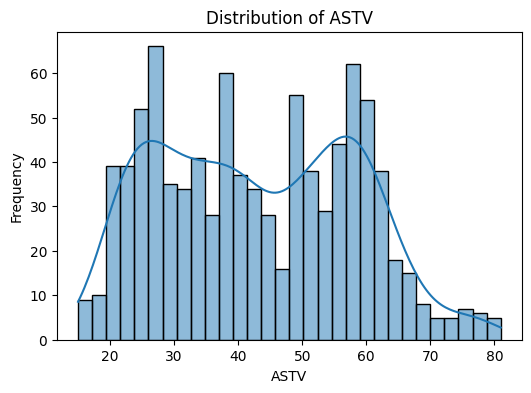

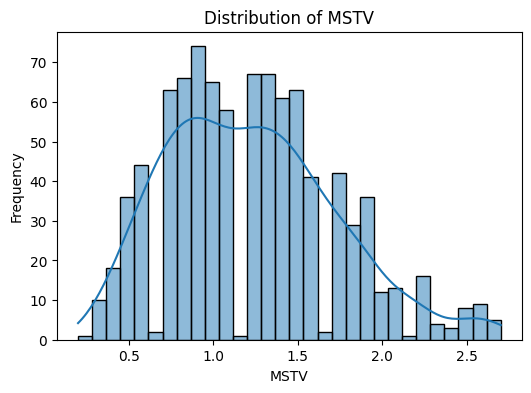

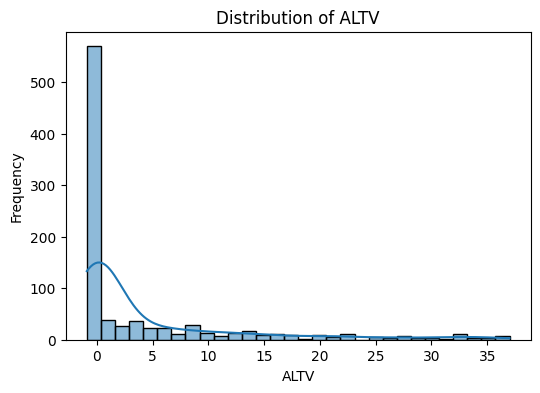

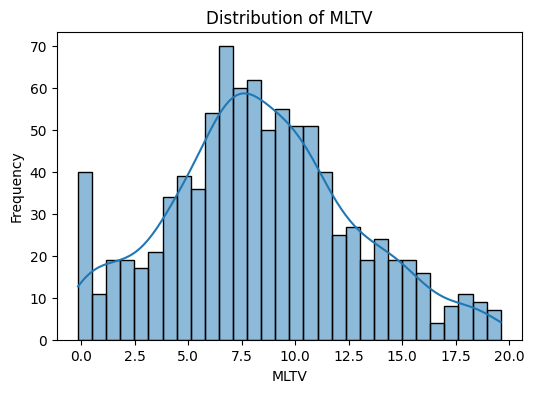

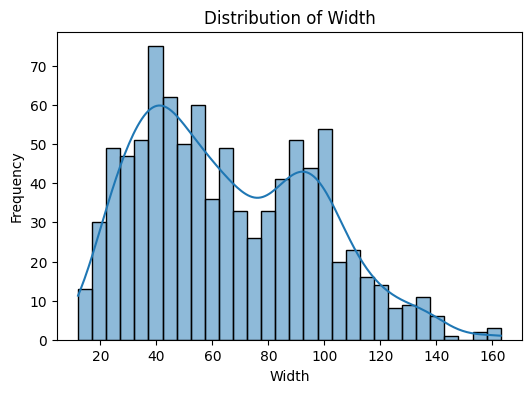

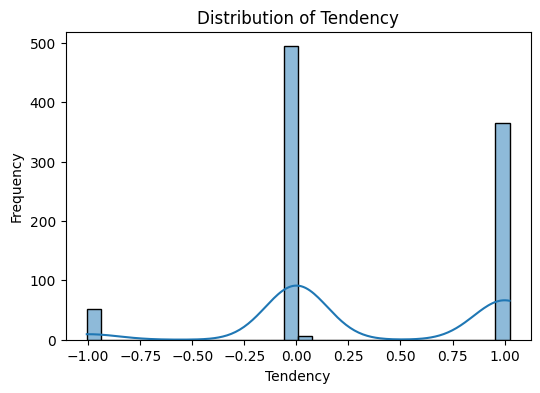

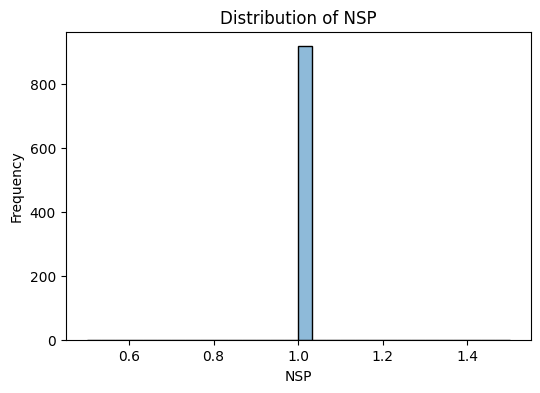

In [5]:
# Task 3: Data Visualization
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

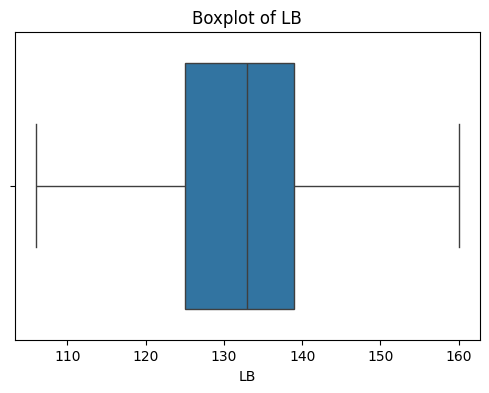

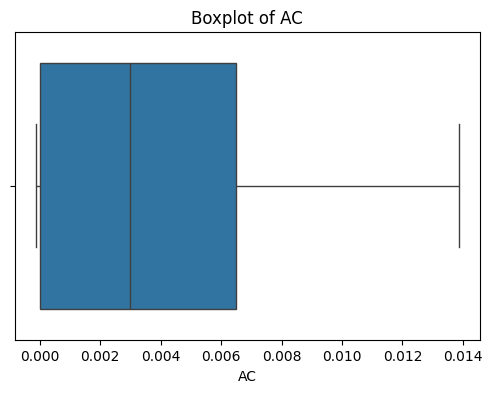

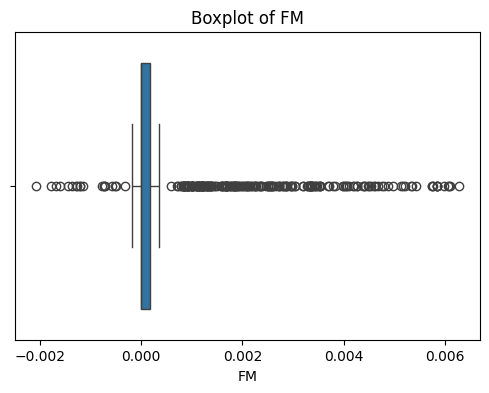

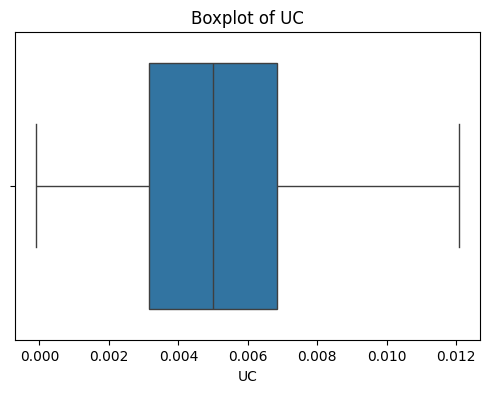

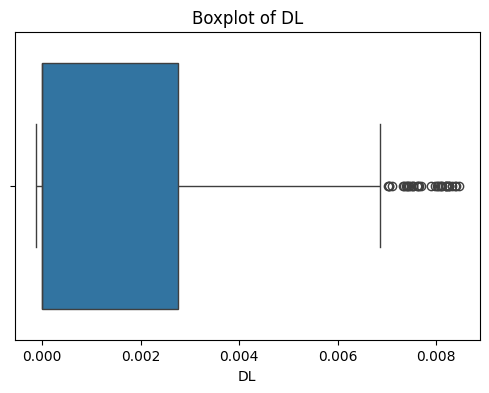

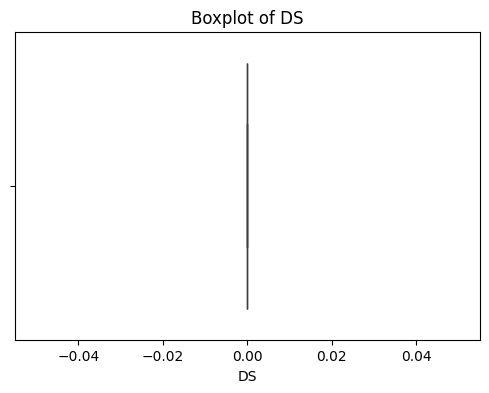

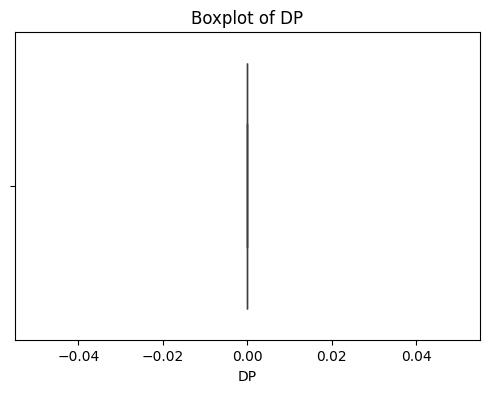

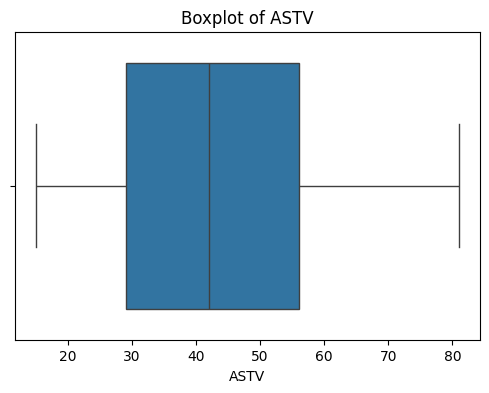

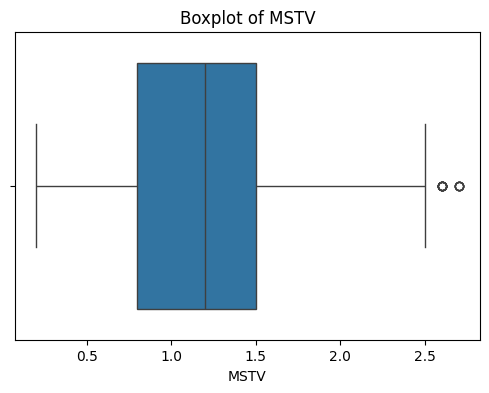

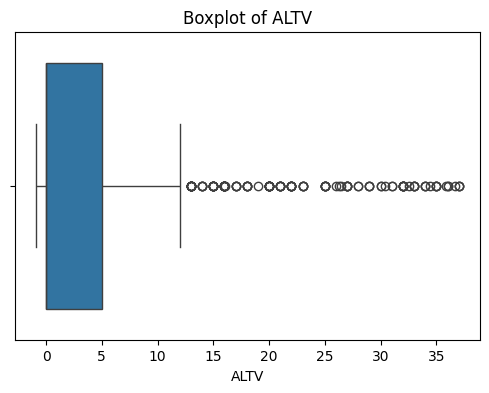

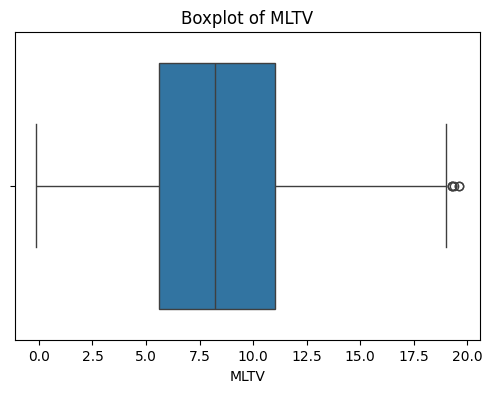

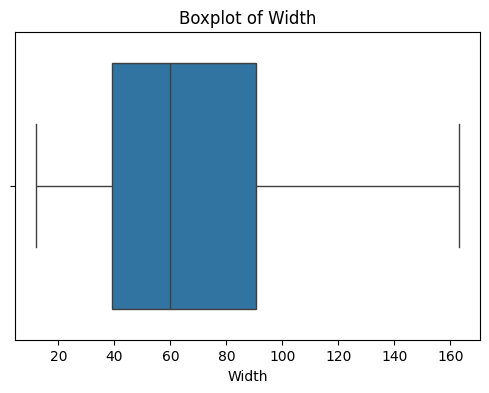

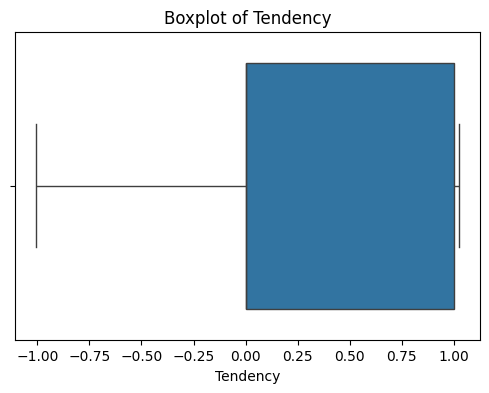

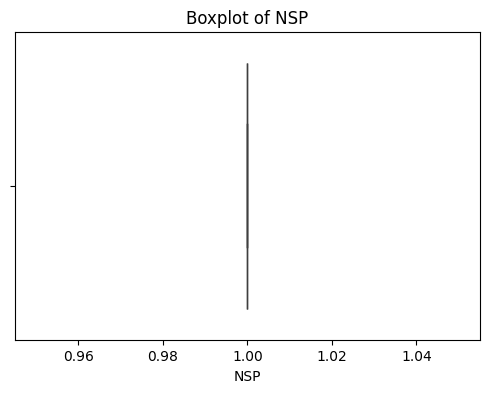

In [6]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

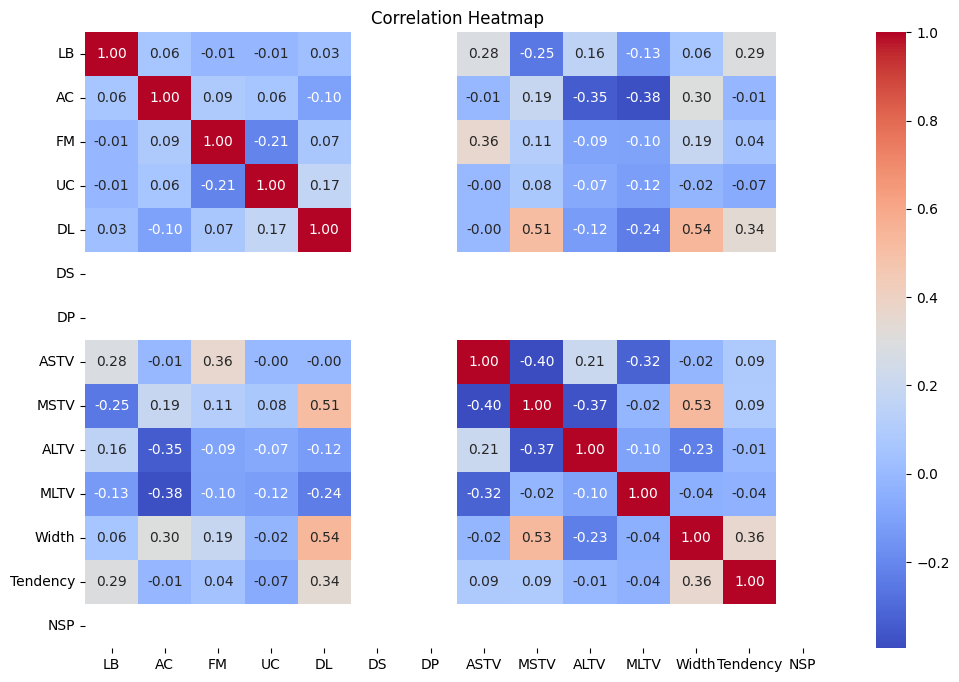

In [7]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

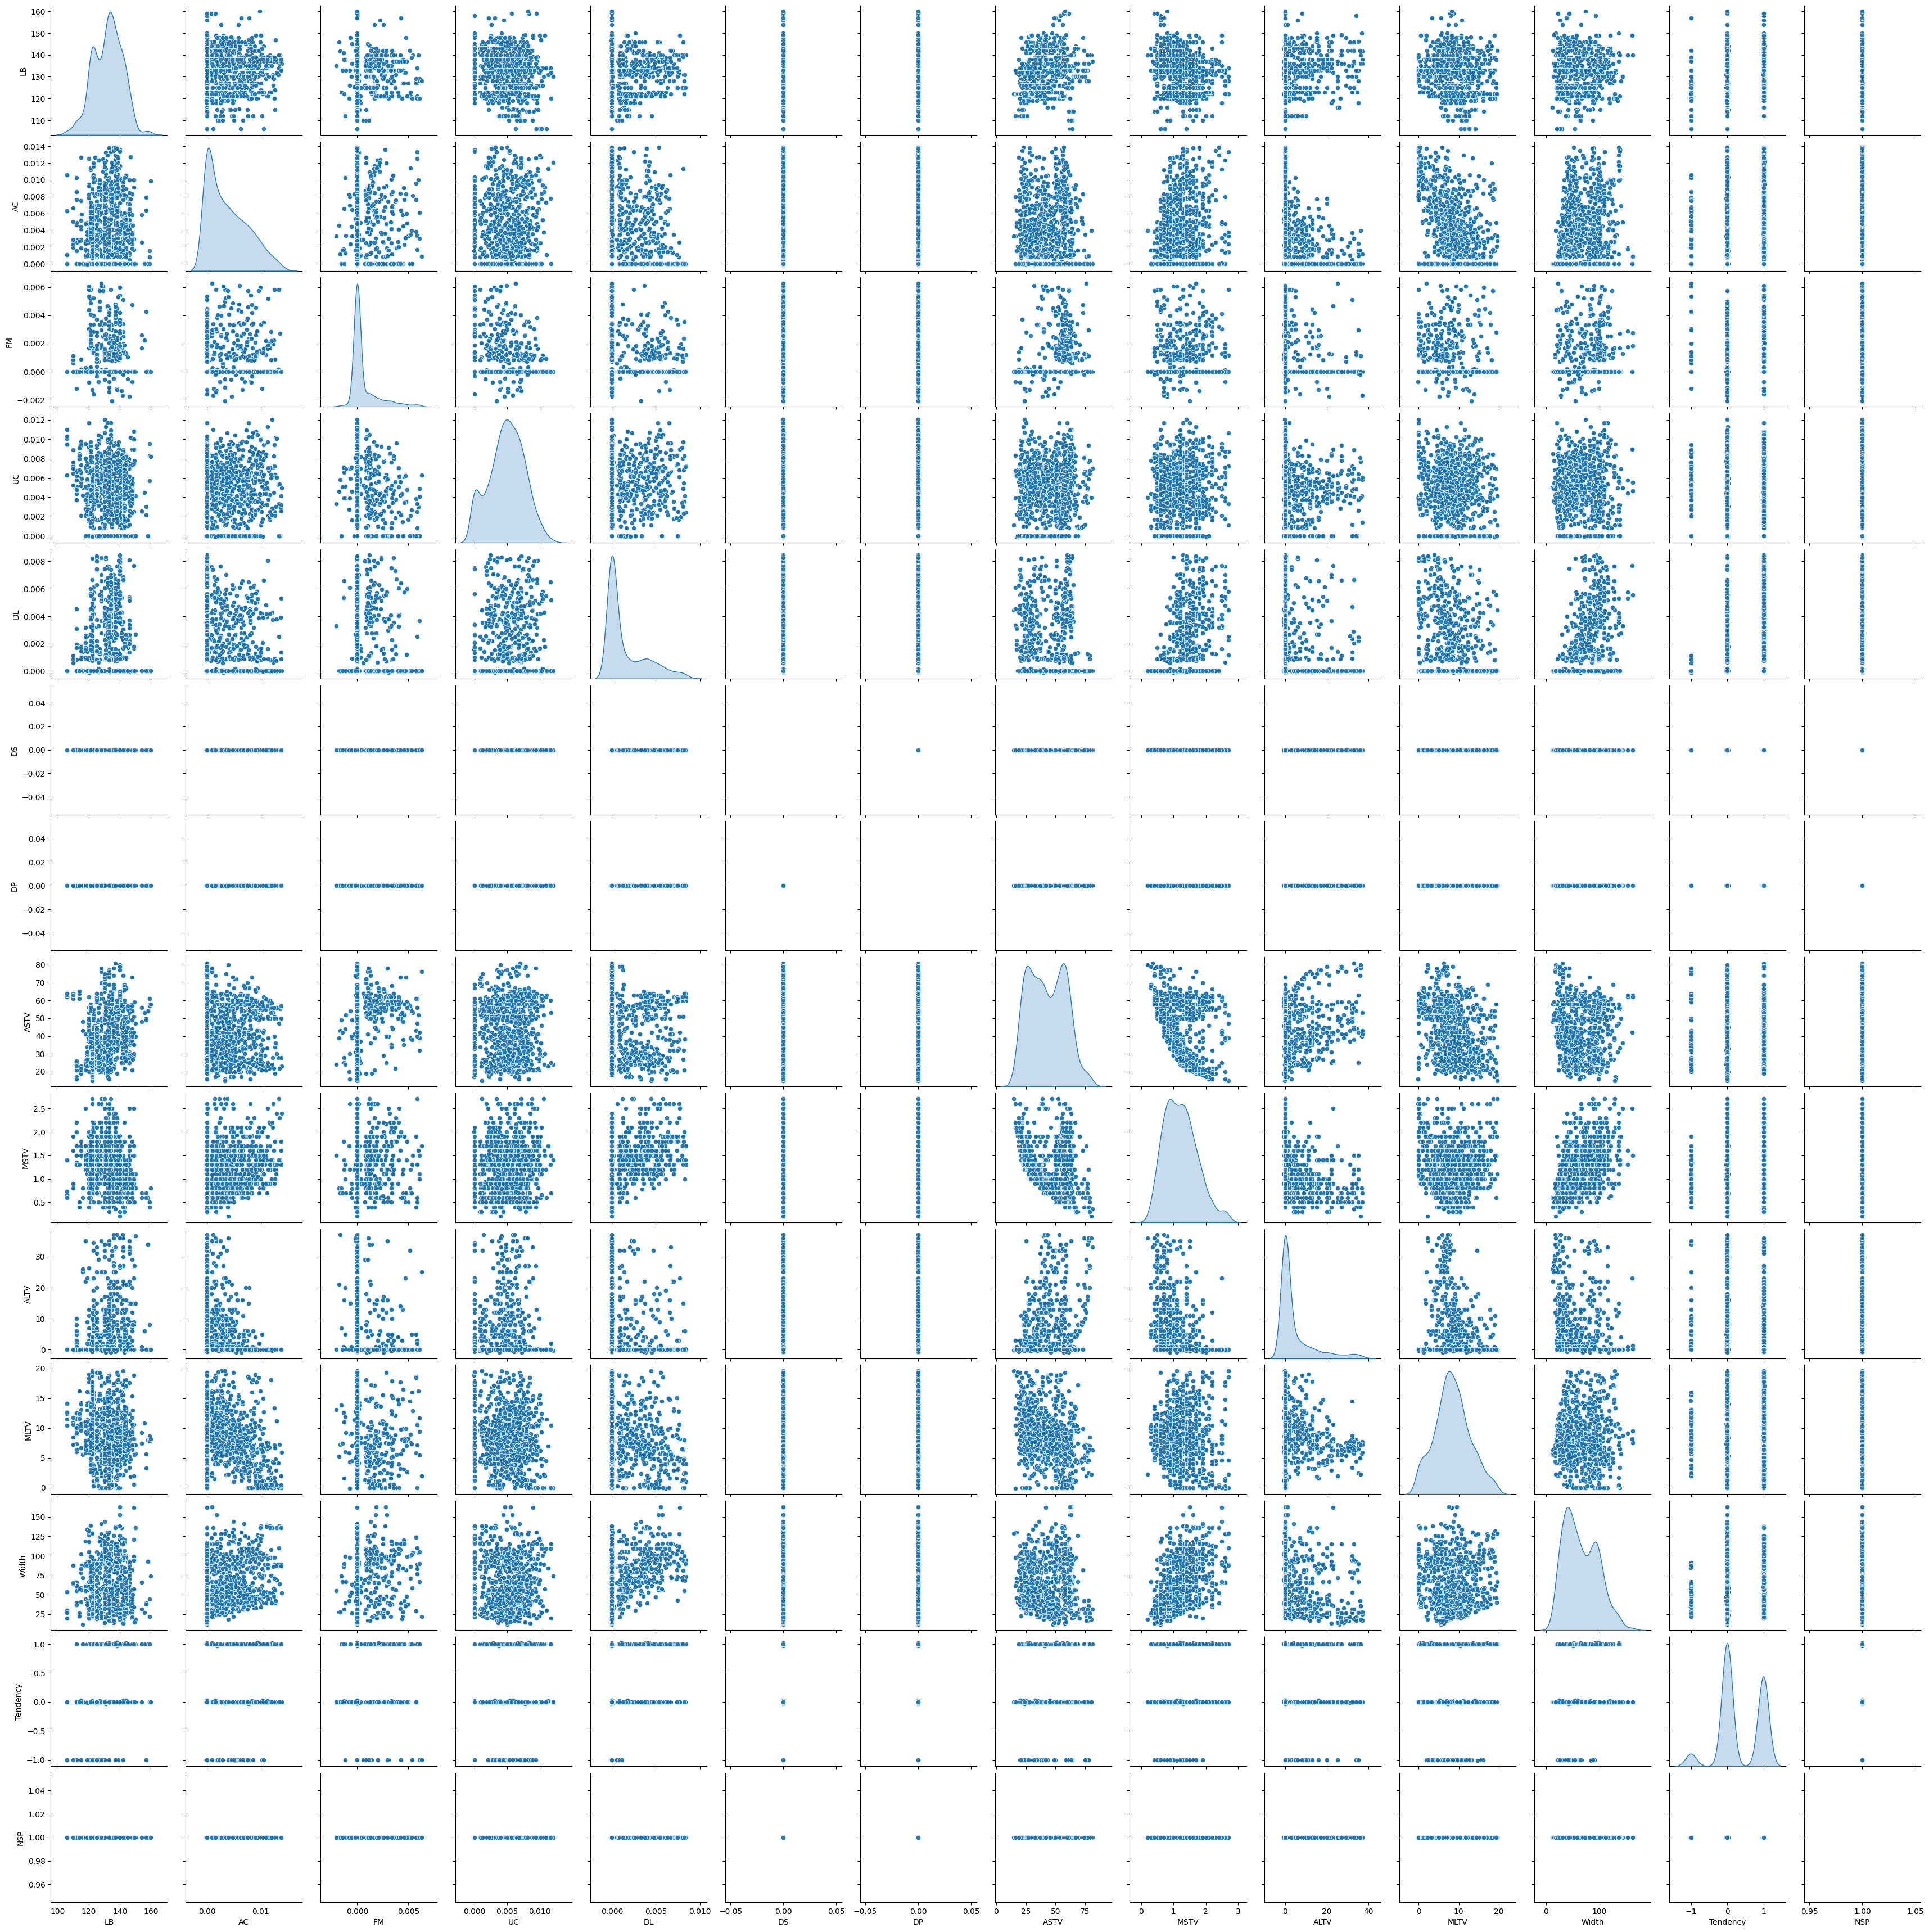

In [8]:
sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.show()


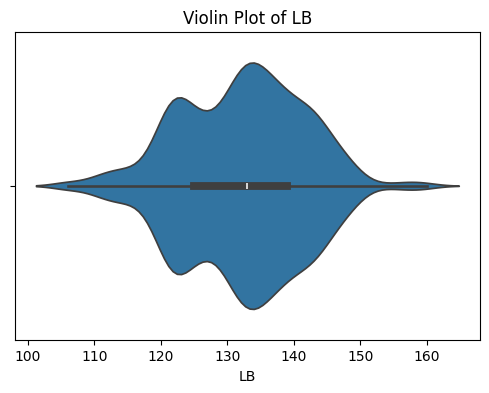

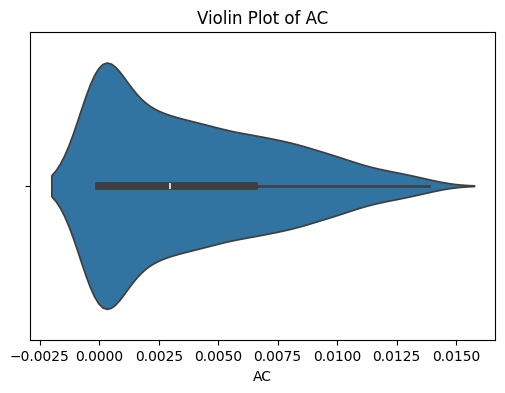

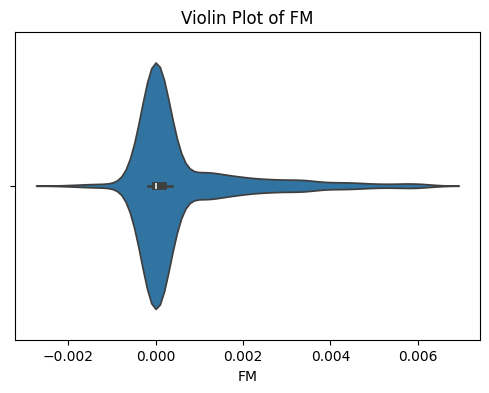

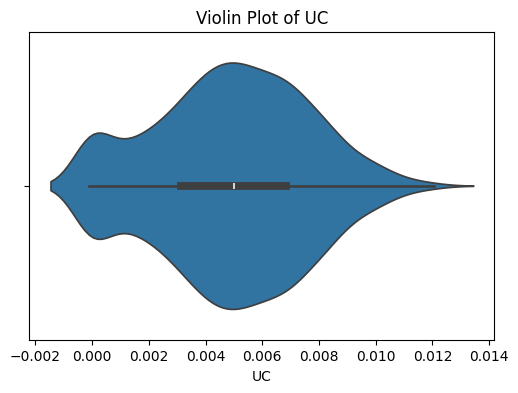

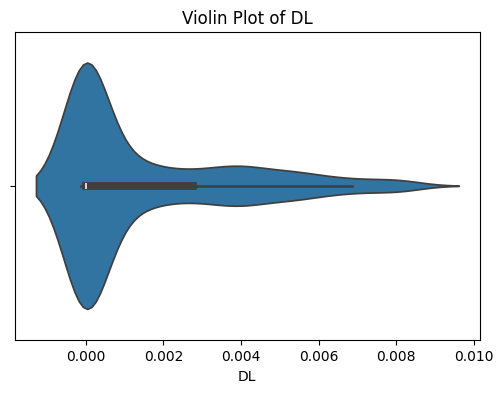

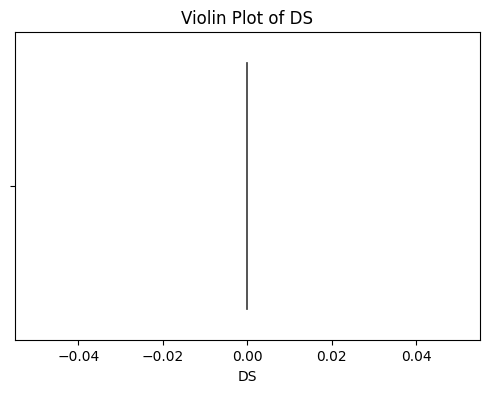

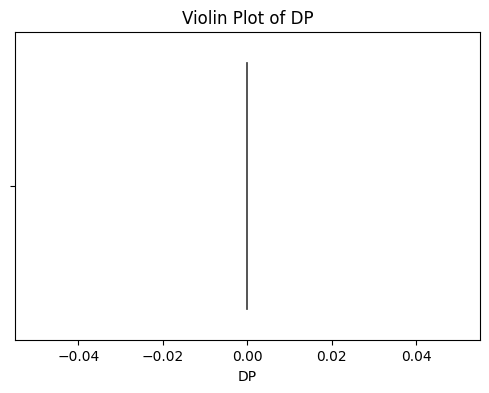

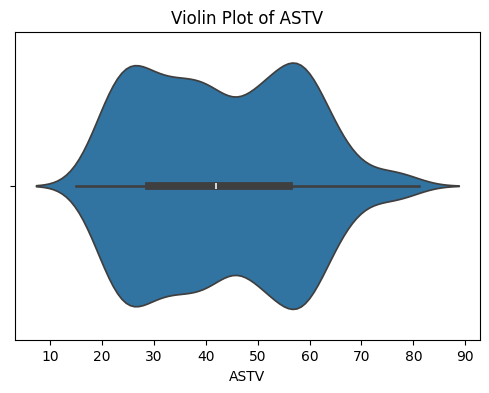

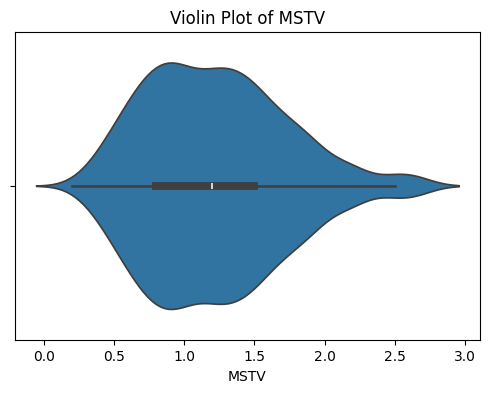

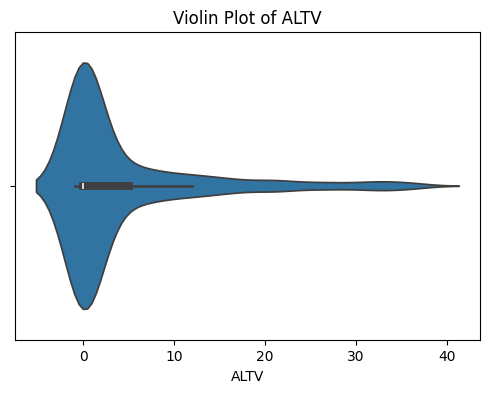

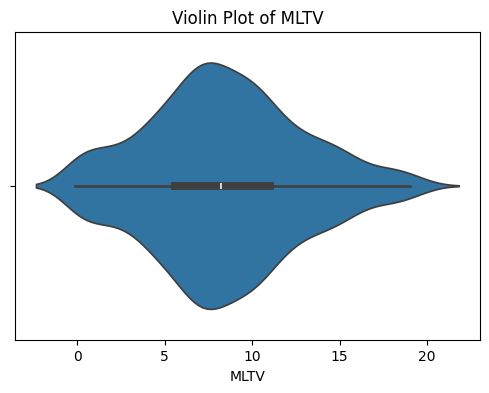

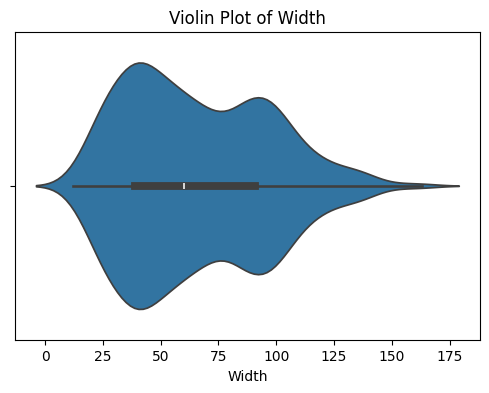

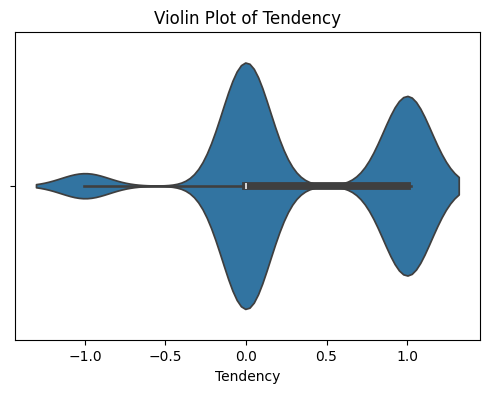

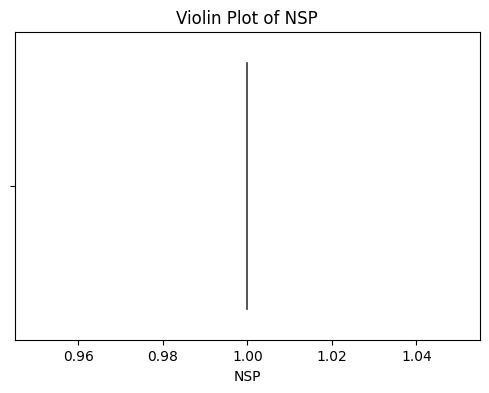

In [9]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x=df[col])
    plt.title(f"Violin Plot of {col}")
    plt.show()

Strong Correlations:
            LB   AC   FM   UC   DL  DS  DP  ASTV  MSTV  ALTV  MLTV  Width  \
LB        1.0  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
AC        NaN  1.0  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
FM        NaN  NaN  1.0  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
UC        NaN  NaN  NaN  1.0  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
DL        NaN  NaN  NaN  NaN  1.0 NaN NaN   NaN   NaN   NaN   NaN    NaN   
DS        NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
DP        NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
ASTV      NaN  NaN  NaN  NaN  NaN NaN NaN   1.0   NaN   NaN   NaN    NaN   
MSTV      NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   1.0   NaN   NaN    NaN   
ALTV      NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   1.0   NaN    NaN   
MLTV      NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   1.0    NaN   
Width     NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN 

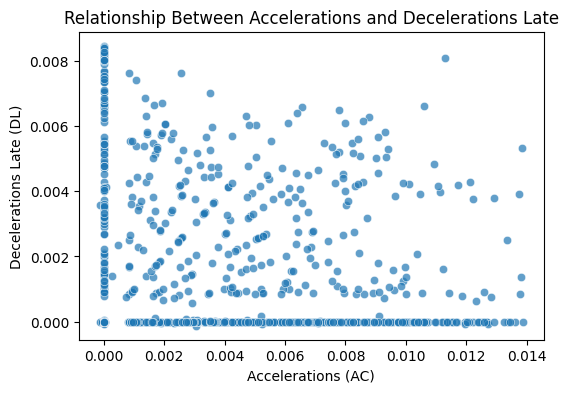

In [10]:
# Task 4: Pattern Recognition and Insights
strong_correlations = corr_matrix[(corr_matrix > 0.7) | (corr_matrix < -0.7)]
print("Strong Correlations:\n", strong_correlations)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='AC', y='DL', alpha=0.7)
plt.title("Relationship Between Accelerations and Decelerations Late")
plt.xlabel("Accelerations (AC)")
plt.ylabel("Decelerations Late (DL)")
plt.show()

In [11]:
# Task 5: Conclusion
print("Key Insights:")
print("1. Variables with strong correlations:\n", strong_correlations)
print("2. Distribution analysis reveals ... (update based on findings)")
summary.to_csv('statistical_summary.csv', index=True)
print("Analysis Complete. Results saved to 'statistical_summary.csv'.")

Key Insights:
1. Variables with strong correlations:
            LB   AC   FM   UC   DL  DS  DP  ASTV  MSTV  ALTV  MLTV  Width  \
LB        1.0  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
AC        NaN  1.0  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
FM        NaN  NaN  1.0  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
UC        NaN  NaN  NaN  1.0  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
DL        NaN  NaN  NaN  NaN  1.0 NaN NaN   NaN   NaN   NaN   NaN    NaN   
DS        NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
DP        NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   NaN    NaN   
ASTV      NaN  NaN  NaN  NaN  NaN NaN NaN   1.0   NaN   NaN   NaN    NaN   
MSTV      NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   1.0   NaN   NaN    NaN   
ALTV      NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   1.0   NaN    NaN   
MLTV      NaN  NaN  NaN  NaN  NaN NaN NaN   NaN   NaN   NaN   1.0    NaN   
Width     NaN  NaN  NaN  NaN  NaN 